In [7]:
# importing necessary imports
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
sns.set() #by default getting proper size of the graph when plotted

In [8]:
df=pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
df.shape

(400, 26)

In [10]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [11]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [12]:
df.duplicated().sum()

0

In [13]:
# Problem statement
# 400 pateints and with some features you've to tell them whether they have chronic kidney disease or not
# Also tell the relationship of the features with the disease

In [14]:
df.isnull().sum().sum()

1009

In [15]:
# Missing value checks
df.isnull().sum()/len(df) * 100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [16]:
# in healthcare dataset removing is not a good approach
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [17]:
# clinical dataset -KNN imputation (advanced preprocessing technique) for null value 
# Also we cannot use capping in outliers in healthare dataset Eg- Some exceptional cases rbc count

In [18]:
# Finding the unique values in the given value
for i in df.columns:
    print(f'*****************{i}*****************')
    print()
    print(set(df[i].tolist()))
    print()

*****************id*****************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 2

In [19]:
df['classification']=df['classification'].apply(lambda x :'ckd' if x=='ckd\t' else x)

In [20]:
df['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [21]:
df['cad']=df['cad'].apply(lambda x :'no' if x=='\tno' else x)

In [22]:
df['cad'].value_counts()

cad
no     364
yes     34
Name: count, dtype: int64

In [23]:
#df['dm'].replace('\tyes','yes',inplace=True)
df['dm']=df['dm'].apply(lambda x :'no' if x=='\tno' else x)
df['dm']=df['dm'].apply(lambda x :'yes' if x=='\tyes' else x)
df['dm']=df['dm'].apply(lambda x :'yes' if x==' yes' else x)


df['dm'].value_counts()

dm
no     261
yes    137
Name: count, dtype: int64

In [24]:
df.rc.mode()

0    5.2
Name: rc, dtype: object

In [25]:
df['rc']=df['rc'].apply(lambda x :'5.2' if x=='\t?' else x)

In [26]:
df['wc']=df['wc'].replace('\t8400','8400')

In [27]:
df['wc']=df['wc'].replace('\t6200','6200')

In [28]:
df['wc'].mode()

0    9800
Name: wc, dtype: object

In [29]:
df['wc']=df['wc'].replace('\t?','9800')

In [30]:
# These are granular level analysis thats why we are going one by one

In [31]:
df['pcv']=df['pcv'].apply(lambda x : '43' if x=='\t43' else x)

In [32]:
df.pcv.mode()

0    41
1    52
Name: pcv, dtype: object

In [33]:
df['pcv']=df['pcv'].apply(lambda x : '41' if x=='\t?' else x)

In [34]:
# This process is also called data cleaning/ data munging / data wrangling

In [35]:
# changing the datatypes of pcv,wc and rc 
df.pcv=df.pcv.fillna(df.pcv.mode()[0])
df.rc=df.rc.fillna(df.rc.mode()[0])
df.wc=df.wc.fillna(df.wc.mode()[0])

df.pcv=df.pcv.astype('int64')
df.wc=df.wc.astype('int64')
df.rc=df.rc.astype('float64')

In [36]:
# Can also use to_numeric to convert the datatypes and exclude nan values

In [37]:
object_col=df.select_dtypes(include=['object']).columns

print('Object type columns: ')
print(object_col)


numeric_col=df.select_dtypes(include=['int64','float64']).columns
print('Numeric type columns: ')
print(numeric_col)

Object type columns: 
Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')
Numeric type columns: 
Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')


In [38]:
from sklearn.impute import SimpleImputer
imp_mode1=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imp_mode2=SimpleImputer(missing_values=np.nan,strategy='median')
df_imp1=pd.DataFrame(imp_mode1.fit_transform(df[object_col]))
df_imp1.columns=df[object_col].columns
df_imp2=pd.DataFrame(imp_mode2.fit_transform(df[numeric_col]))
df_imp2.columns=df[numeric_col].columns



In [39]:
print(df_imp1.isnull().sum().sum())
print()
print(df_imp2.isnull().sum().sum())

0

0


In [40]:
df_imp1

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [41]:
df_imp2

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,1.0,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,396.0,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,397.0,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,398.0,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [42]:
df_imp2.drop(columns=['id'],inplace=True)

In [43]:
df_imp2

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


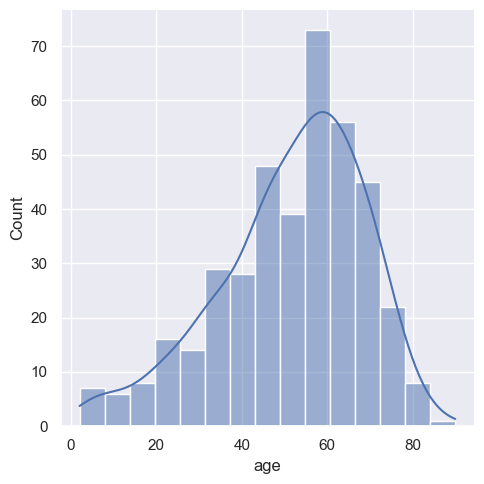

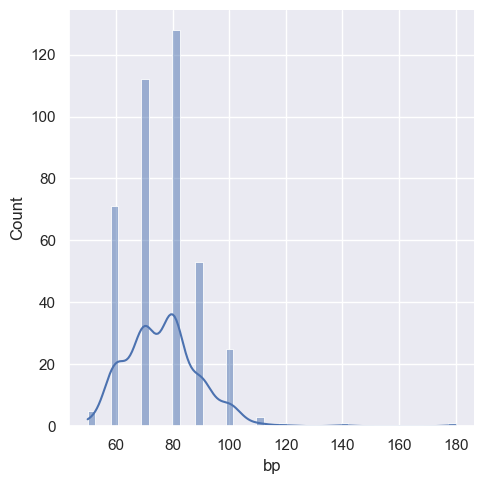

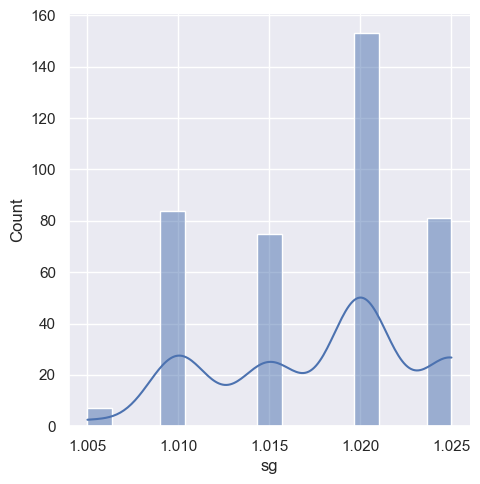

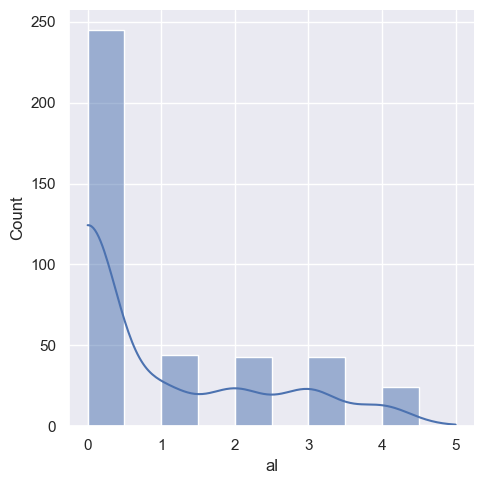

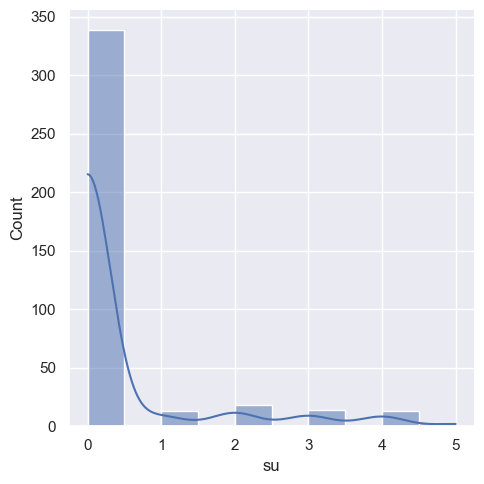

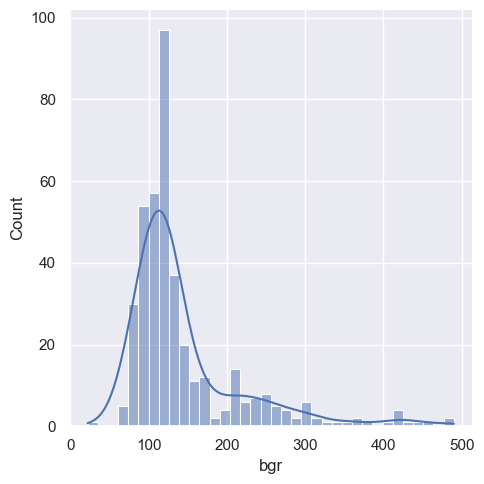

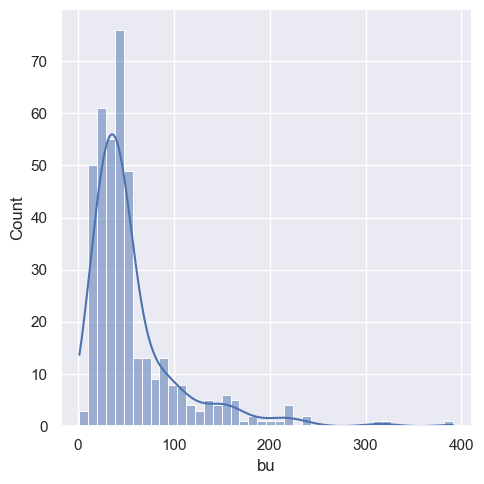

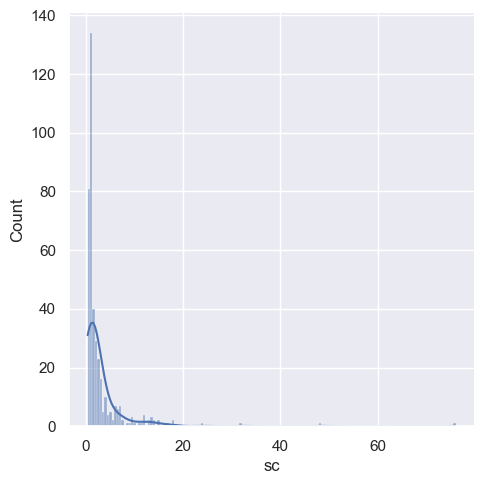

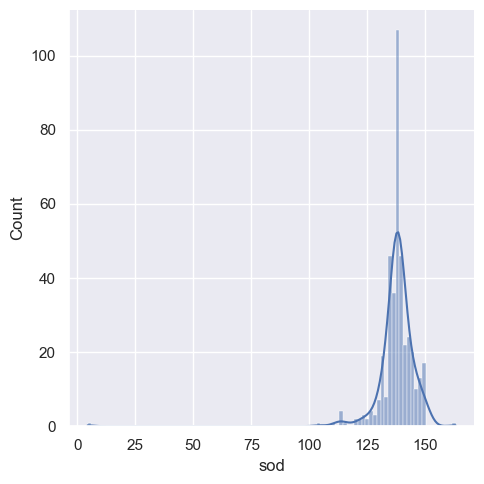

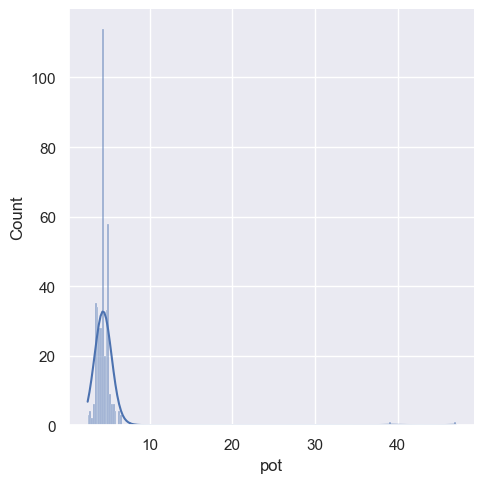

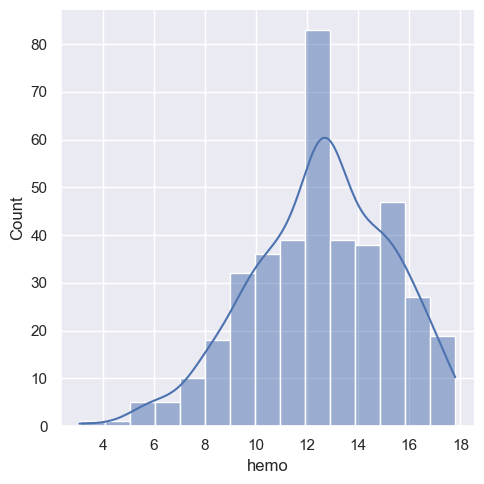

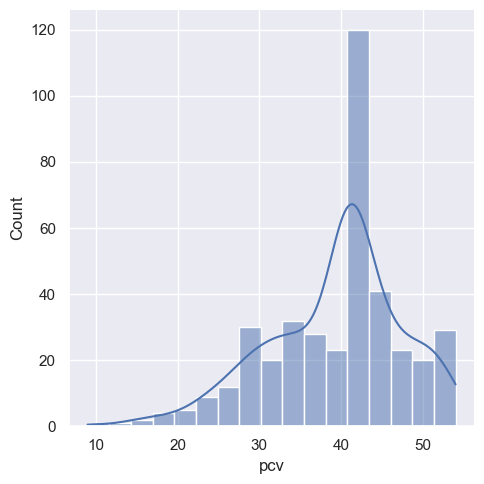

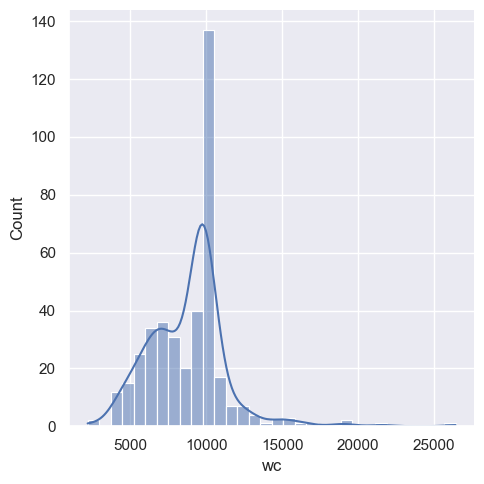

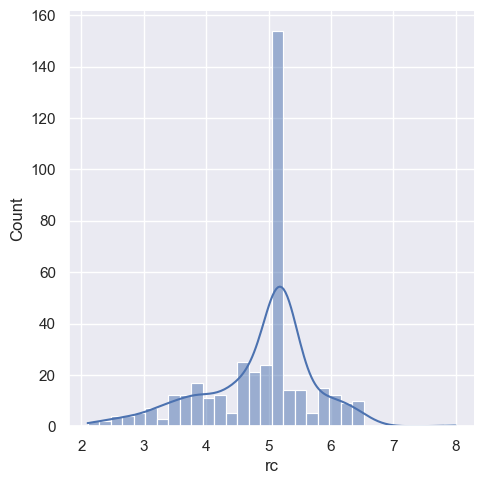

In [44]:
# Checking outliers
def displots(col):
    sns.displot(df_imp2[col],kde=True)
    plt.show()

for i in list(df_imp2.select_dtypes(exclude=['object']).columns)[0:]:
    displots(i)
# If right or left skewed then there is an outlier  

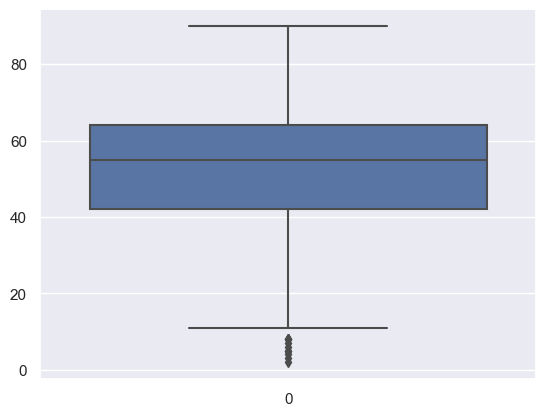

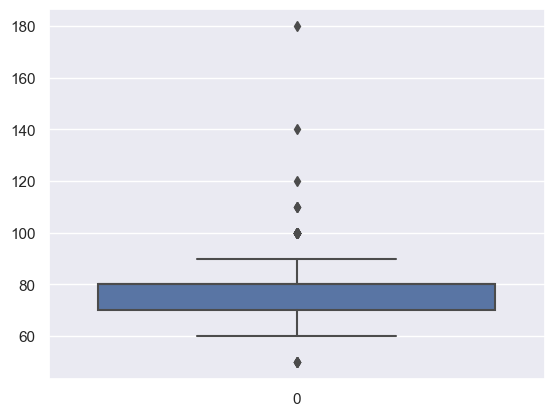

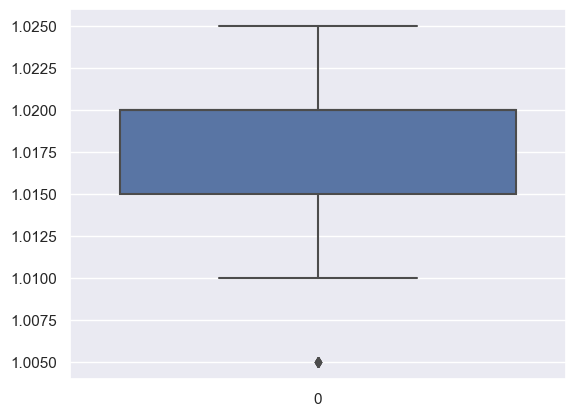

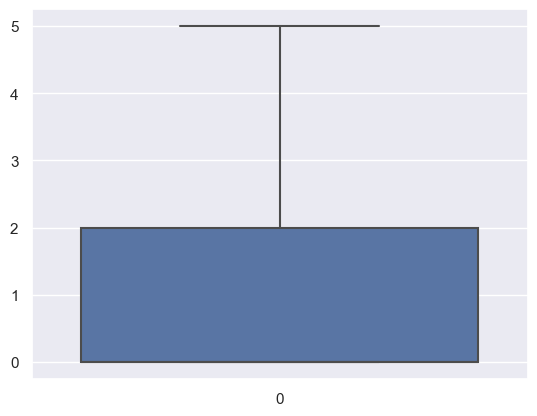

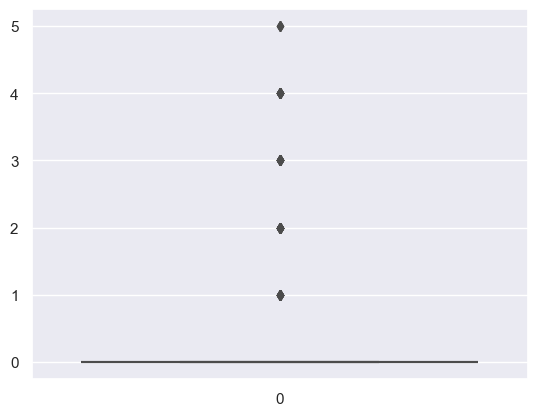

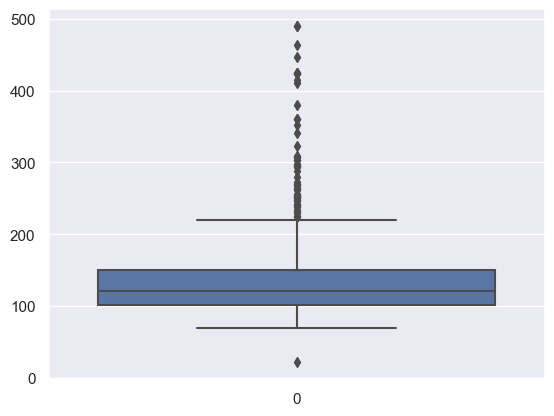

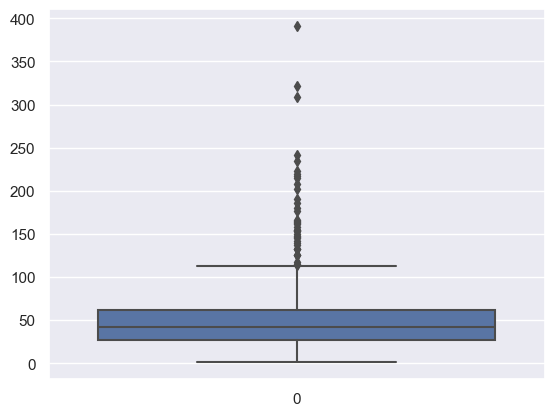

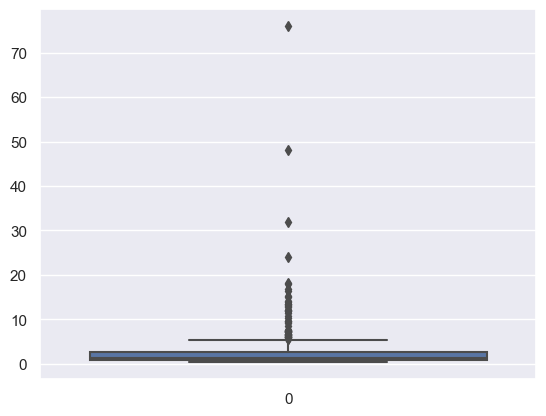

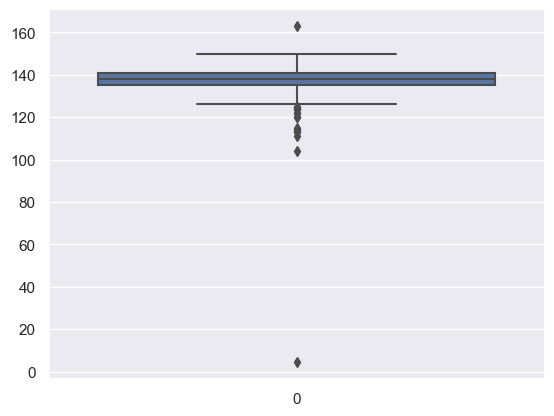

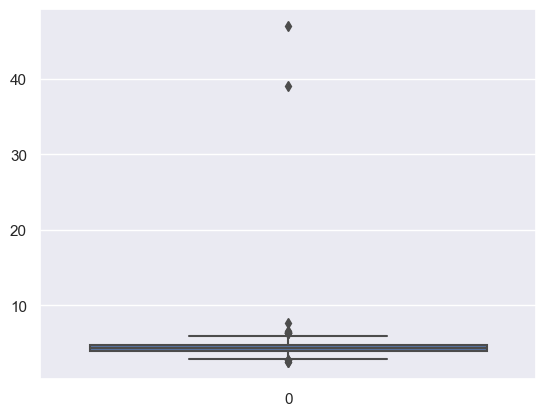

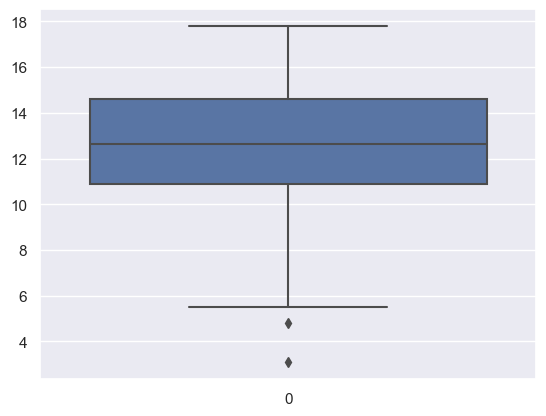

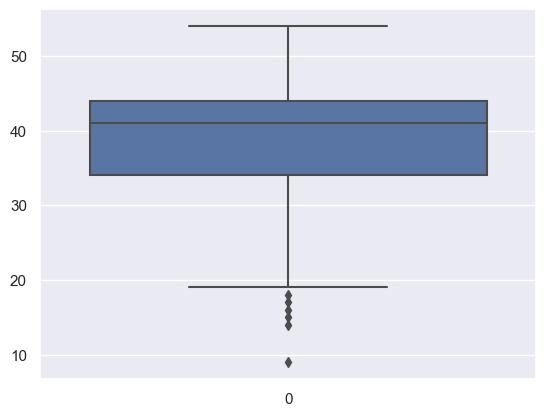

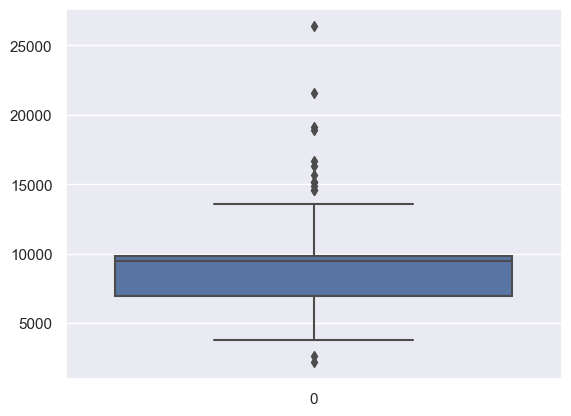

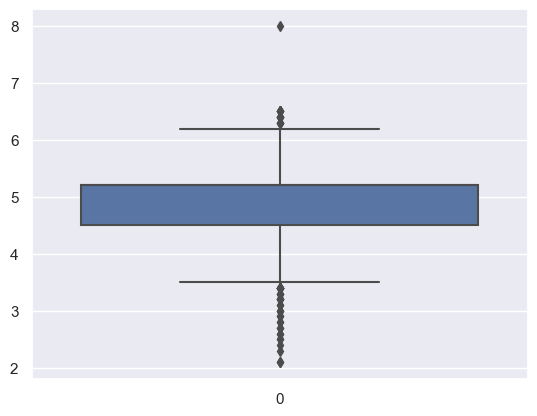

In [45]:
# Using boxplot
def boxplots(col):
    sns.boxplot(df_imp2[col])
    plt.show()

for i in list(df_imp2.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [46]:
df_imp1.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [47]:
df_imp2.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

In [48]:
# Since there are no matching columns to merge

df_imp1['test']='test'
df_imp2['test']='test'

In [49]:
table_df=pd.concat([df_imp1,df_imp2],axis=1)

In [50]:
table_df


,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,test
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,test
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2,test
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2,test
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,test
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,test
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,test
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,test
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,test


In [51]:
table_df.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification', 'test', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'test'],
      dtype='object')

In [52]:
table_df.drop('test',axis=1,inplace=True)

In [53]:
table_df

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [54]:
# Split the data into dependent and independent variables
x=table_df.drop('classification',axis=1)
y=table_df['classification']

In [55]:
y=np.where(y=='ckd',1,0)

In [56]:
pd.DataFrame(y).value_counts()

1    250
0    150
Name: count, dtype: int64

In [57]:
# Handling encoding concept
def classify_features(x):
    categorical_features=[]
    non_categorical_features=[]
    discrete_features=[]
    continous_features=[]
    for column in x.columns:
        if x[column].dtype=='object':
            if x[column].nunique()<10: # 3 because cat has binary value
                categorical_features.append(column)
            else: 
              non_categorical_features.append(column)
        elif x[column].dtype in ['int64','float64']:
            if x[column].nunique()<100:
                discrete_features.append(column)
            else:
                continous_features.append(column)
    return categorical_features,non_categorical_features,discrete_features,continous_features




In [58]:
cat,noncat,dis,cont=classify_features(x)

In [59]:
cat # binary values so we can use either le or ohe

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [60]:
noncat # here we have to think either to use le or ohe based on the data
# here we dont have any noncat data

[]

In [61]:
dis

['age', 'bp', 'sg', 'al', 'su', 'sc', 'sod', 'pot', 'pcv', 'wc', 'rc']

In [62]:
cont

['bgr', 'bu', 'hemo']

In [63]:
# Difference between label encoder and one hot encoding
# label encoder for ordinal and ohe for nominal
# Tree based model - label encoder (no impact) ,you can use either le or ohe
# linear/logical regression supports ohe , use le only if the data is ordinal

#### EDA

In [65]:
!pip install dtale

In [66]:
import dtale
dtale.show(table_df)

In [67]:
for i in cat:
    print(x[i].value_counts())
    print()

rbc
normal      353
abnormal     47
Name: count, dtype: int64

pc
normal      324
abnormal     76
Name: count, dtype: int64

pcc
notpresent    358
present        42
Name: count, dtype: int64

ba
notpresent    378
present        22
Name: count, dtype: int64

htn
no     253
yes    147
Name: count, dtype: int64

dm
no     263
yes    137
Name: count, dtype: int64

cad
no     366
yes     34
Name: count, dtype: int64

appet
good    318
poor     82
Name: count, dtype: int64

pe
no     324
yes     76
Name: count, dtype: int64

ane
no     340
yes     60
Name: count, dtype: int64



In [68]:
df_dummies=pd.get_dummies(x[cat],drop_first=True)
df_dummies

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,True,True,False,False,True,True,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False
2,True,True,False,False,False,True,False,True,False,True
3,True,False,True,False,True,False,False,True,True,True
4,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
395,True,True,False,False,False,False,False,False,False,False
396,True,True,False,False,False,False,False,False,False,False
397,True,True,False,False,False,False,False,False,False,False
398,True,True,False,False,False,False,False,False,False,False


In [69]:
c=df_dummies.columns

In [70]:
df_dummies=np.where(df_dummies==True ,1,0)

In [71]:
df_dummies=pd.DataFrame(df_dummies,columns=c)

In [72]:
df1=pd.concat([x.drop(columns=cat),df_dummies],axis=1)
df1

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,1,1,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,1,1,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,1,1,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,1,1,0,0,0,0,0,0,0,0


In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          400 non-null    float64
 1   bp           400 non-null    float64
 2   sg           400 non-null    float64
 3   al           400 non-null    float64
 4   su           400 non-null    float64
 5   bgr          400 non-null    float64
 6   bu           400 non-null    float64
 7   sc           400 non-null    float64
 8   sod          400 non-null    float64
 9   pot          400 non-null    float64
 10  hemo         400 non-null    float64
 11  pcv          400 non-null    float64
 12  wc           400 non-null    float64
 13  rc           400 non-null    float64
 14  rbc_normal   400 non-null    int64  
 15  pc_normal    400 non-null    int64  
 16  pcc_present  400 non-null    int64  
 17  ba_present   400 non-null    int64  
 18  htn_yes      400 non-null    int64  
 19  dm_yes  

In [74]:
df1.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,...,0.882500,0.810000,0.105000,0.055000,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,...,0.322418,0.392792,0.306937,0.228266,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [75]:
# Preprocessing done  **** Very important ****
# Part 1 - Missing value treatment done 
# part 2 - encoding done 
# part 3 - outlier treatment - not required (numerical variable only)
# No outlier treatment because it is a clinical sector data , so abnormality matters
# Treat outliers only if wrong data is given eg age=800
# Part 4 Feature Scaling - Normalisation or Standardisation - Depends basis the result 
# Only in distance based model norm when no outlier else standard..
# Part 5 - Imbalance treatment (only in classification problem, class imbalance)



### split the data into train and test

In [77]:
y=pd.DataFrame(y)
y.columns=['Classification']

In [78]:
cleaned_df=pd.concat([df1,y],axis=1)
cleaned_df

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,Classification
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,0,0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,0,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,0,0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,1,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,1,0,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,1,0,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,1,0,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,1,0,0,0,0,0,0,0,0,0


In [79]:
# cleaned_df.to_csv('cleaned_kidney_df.csv')

In [80]:
x_train,x_test,y_train,y_test=train_test_split(df1,y,test_size=0.2,random_state=42,stratify=y)

In [81]:
# In some cases stratify can also handle imbalance problem

In [82]:
pd.DataFrame(y_train).value_counts()

Classification
1                 200
0                 120
Name: count, dtype: int64

In [83]:
pd.DataFrame(y_test).value_counts()

Classification
1                 50
0                 30
Name: count, dtype: int64

### Building Machine Learning (Training Algorithm)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# evaluation metrics
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

    Method Used  Accuracy
0      LogitReg    0.8500
1  Decisiontree    0.9750
2  RandomForest    1.0000
3       XGBoost    0.9875
4           KNN    0.7000
5           SVM    0.7125
6           NBT    0.9750
7        Voting    0.9750
Axes(0.125,0.11;0.775x0.77)


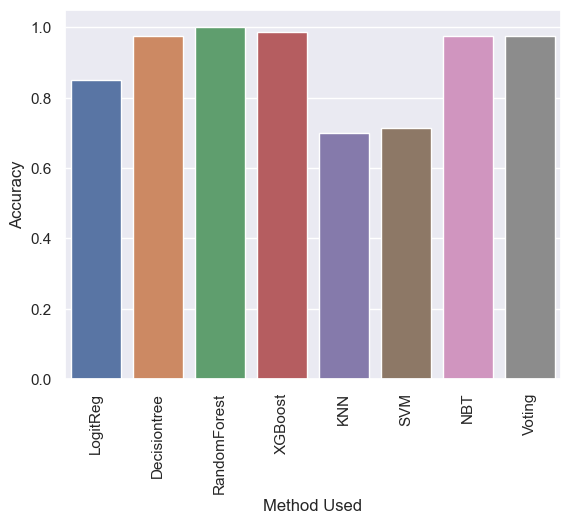

In [86]:
# Logistic Regression
logit=LogisticRegression()
logit=logit.fit(x_train,y_train)
y_pred_lr=logit.predict(x_test)
accuracy_lr=accuracy_score(y_test,y_pred_lr)

# Decision Tree
dt=DecisionTreeClassifier()
dt=dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
accuracy_dt=accuracy_score(y_test,y_pred_dt)

# Random Forest
rf=RandomForestClassifier()
rf=rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
accuracy_rf=accuracy_score(y_test,y_pred_rf)

# XGboost
xgb=XGBClassifier()
xgb=xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
accuracy_xgb=accuracy_score(y_test,y_pred_xgb)


# KNN 
knn=KNeighborsClassifier()
knn=knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
accuracy_knn=accuracy_score(y_test,y_pred_knn)

# SVM
svm=SVC()
svm=svm.fit(x_train,y_train)
y_pred_sv=svm.predict(x_test)
accuracy_sv=accuracy_score(y_test,y_pred_sv)

# Naive Bayes
nb=GaussianNB()
nb=nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
accuracy_nb=accuracy_score(y_test,y_pred_nb)

# Voting classifier - combining all above model together by using voting classifier approach
model_evc=VotingClassifier(estimators=[('logit',logit),('dt',dt),('rf',rf),('xgb',xgb),('knn',knn),('svm',svm),('nb',nb)],voting='hard')
model_evc=model_evc.fit(x_train,y_train)
pred_evc=model_evc.predict(x_test)
accuracy_evc=accuracy_score(y_test,pred_evc)


list1=['LogitReg','Decisiontree','RandomForest','XGBoost','KNN','SVM','NBT','Voting']
list2=[accuracy_lr,accuracy_dt,accuracy_rf,accuracy_xgb,accuracy_knn,accuracy_sv,accuracy_nb,accuracy_evc]
list3=[logit,dt,rf,xgb,knn,svm,nb,model_evc]

df_accuracy=pd.DataFrame({"Method Used":list1,"Accuracy":list2})

print(df_accuracy)

chart=sns.barplot(x="Method Used",y="Accuracy",data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
print(chart)

In [87]:
# Check underfitting and overfitting problem (high bias or high variance problem) 
#- Bias-Variance trade off
pred_evc_train=model_evc.predict(x_train)
pred_evc_test=model_evc.predict(x_test)
accuracy_evc_train=accuracy_score(y_train,pred_evc_train)
accuracy_evc_test=accuracy_score(y_test,pred_evc_test)

print('*************************')
print('Training Accuracy',accuracy_evc_train)
print('*************************')
print('Testing Accuracy',accuracy_evc_test)


*************************
Training Accuracy 1.0
*************************
Testing Accuracy 0.975


In [88]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training=cross_val_score(model_evc,x_train,y_train,cv=10)
print('Training Accuracy : ',training.mean())
print('*************************')
print('Test Accuracy : ',accuracy_evc_test)

Training Accuracy :  0.9875
*************************
Test Accuracy :  0.975


### Hence we can say that the model is absolutely fit

In [90]:
print('Classification report of test\n',classification_report(y_test,pred_evc_test))
print('*************************')
print('Classification report of test\n',classification_report(y_train,pred_evc_train))

Classification report of test
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.98      0.98      0.98        50

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

*************************
Classification report of test
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       200

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [91]:
print('Confusion Matrix of test\n',confusion_matrix(y_test,pred_evc_test))
print('*************************')
print('Confusion Matrix of train\n',confusion_matrix(y_train,pred_evc_train))

Confusion Matrix of test
 [[29  1]
 [ 1 49]]
*************************
Confusion Matrix of train
 [[120   0]
 [  0 200]]


# Deployment part

In [93]:
# saving the model
import pickle
pick_out=open('classifier.pkl',mode='wb')
pickle.dump(model_evc,pick_out)
pick_out.close

<function BufferedWriter.close>

In [181]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   bgr             400 non-null    float64
 6   bu              400 non-null    float64
 7   sc              400 non-null    float64
 8   sod             400 non-null    float64
 9   pot             400 non-null    float64
 10  hemo            400 non-null    float64
 11  pcv             400 non-null    float64
 12  wc              400 non-null    float64
 13  rc              400 non-null    float64
 14  rbc_normal      400 non-null    int64  
 15  pc_normal       400 non-null    int64  
 16  pcc_present     400 non-null    int64  
 17  ba_present      400 non-null    int

In [189]:
cleaned_df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc_normal', 'pc_normal', 'pcc_present',
       'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes',
       'ane_yes', 'Classification'],
      dtype='object')

In [191]:
%%writefile app.py

import sklearn
import streamlit as st # frontend code
import pickle
# loading the trained model
pickle_in=open('classifier.pkl','rb')
classifier=pickle.load(pickle_in)

@st.cache()

def prediction(age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pr_yes,ane_yes):
    # making prediction
    prediction = classifier.predict([[age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pr_yes,ane_yes]])
    if prediction == 0:
        pred='kidney disease not detected'
    else:
        pred='kidney disease found'
    return pred


# write streamlit function now
def main():
    html_temp='''
    <div style = "backgrounf-color:cyan:padding:13px".
    <h1 style="color:black;text-align:center;">Kidney Disease Prediction </h1>
    </div>
    '''
    st.markdown(html_temp,unsafe_allow_html=True)
    htn_yes= st.selectbox('htn',(0,1))
    dm_yes=st.selectbox('dm status',(0,1))
    cad_yes=st.selectbox('cad',(0,1))
    pr_yes=st.selectbox('pr',(0,1))
    ane_yes=st.selectbox('ane',(0,1))
    ba_present=st.selectbox('ba present',(0,1))
    pc_normal=st.selectbox('pc normal',(0,1))
    pcc_present=st.selectbox('pcc present',(0,1))
    appet_poor=st.selectbox('appet poor',(0,1))
    rbc_normal=st.selectbox('rbc normal',(0,1))
    pe_yes=st.selectbox('pe yes',(0,1))
    age=st.number_input("Age")
    bp=st.number_input("Bp")
    sg=st.number_input("sg")
    al=st.number_input("Al")
    su=st.number_input("su")
    bgr=st.number_input("bgr")
    bu=st.number_input("bu")
    sc=st.number_input("sc")
    sod=st.number_input("sod")
    pot=st.number_input("pot")
    hemo=st.number_input("hemo")
    pcv=st.number_input("pcv")
    wc=st.number_input("wc")
    rc=st.number_input("rc")
    result =''
    # When predict is clicked make the prediction and store it
    if st.button('Predict'):
       result=prediction(age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pr_yes,ane_yes)
       st.success('Report Results : {}'.format(result))


if __name__=='__main__':
    main()



    
    
    
    

Writing app.py


In [193]:
!pip install streamlit

In [217]:
cleaned_df.head(1).values

array([[4.80e+01, 8.00e+01, 1.02e+00, 1.00e+00, 0.00e+00, 1.21e+02,
        3.60e+01, 1.20e+00, 1.38e+02, 4.40e+00, 1.54e+01, 4.40e+01,
        7.80e+03, 5.20e+00, 1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00]])

In [219]:
cleaned_df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc_normal', 'pc_normal', 'pcc_present',
       'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes',
       'ane_yes', 'Classification'],
      dtype='object')

In [237]:
cleaned_df.head(1)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,Classification
0,48.0,80.0,1.02,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,0,0,1,1,0,0,0,0,1
